# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [2]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)

### Load the dataset

Load the cleaned dataset.

In [3]:
#your code here
wnba = pd.read_csv('wnba_clean.csv')

# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [11]:
# your answer here
# the sample needs to be representative for all league players

# the sample should be randomized to avoid sampling bias

# observations of the sample must be independent

# adequate sample size 

# if population standard deviation is known, z-distribution can be used,

# otherwise use t-distribution (however, if the sample size is large, 
# t-distribution will be quite close to the z distribution)

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [4]:
# your code here
# we can compute the sample mean
# we do NOT know the population std 
# so we need to use the T-distribution

mean = wnba.Weight.mean()
print(mean)

std = wnba.Weight.std()
# print(std)

sigma = std / (math.sqrt(len(wnba.Weight)))
# print(sigma)

confidence_interval = stats.t.interval(alpha = 0.95, df = 141, loc = mean, scale = sigma)
confidence_interval

# same interval with norm, as the sample is relatively big

78.97887323943662


(77.15461406720749, 80.80313241166576)

**What can you say about these results?**

In [10]:
#your-answer-here
"""
The population mean is for 95% confident to be within the confidence interval, I also checked the norm interval and 
this is the same, the sample is relatively big, and the bigger the sample the more equal the z and t interval
"""

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [9]:
#your-answer-here
"""
The mean of the population will likely be within this confidence interval, however, that
the average weight lies between these values, will not say that she is not able to be a top
league player, it only indicates that the average weight is higher than her weight is. 
First, we need to look more closely to the distribution, than only conclude our opininon
on this result, the mean

If you look to the plot below, you see that the weight 67 still is within the range and therefore, 
you can say she really could make it to become a professional basketbal player
"""

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

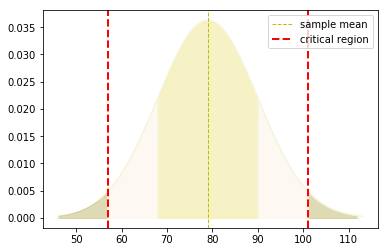

In [22]:
# your code here
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

x_min = wnba.Weight.min()
x_max = wnba.Weight.max()

mean =  wnba.Weight.mean()
# std = wnba.Weight.std()

# std_zero = wnba.Weight.std()

# std = std_zero / (math.sqrt(len(wnba.Weight)))

std = wnba.Weight.std()

x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='beige')

# fill area 1

pt1 = mean + std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='beige')

pt2 = mean - std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='beige')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='khaki', alpha='0.5')

# fill area 2

pt1 = mean + std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='beige')

pt3 = mean + 2.0 * std
plt.plot([pt3 ,pt3 ],[0.0,scipy.stats.norm.pdf(pt3 ,mean, std)], color='beige')

ptx = np.linspace(pt1, pt3, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='oldlace', alpha='0.5')

# fill area 3

pt1 = mean - std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='beige')

pt4 = mean - 2.0 * std
plt.plot([pt4 ,pt4 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='beige')

ptx = np.linspace(pt1, pt4, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='oldlace', alpha='0.5')

# fill area 4

pt1 = mean + 2.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='beige')

pt2 = mean + 3.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='beige')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='darkkhaki', alpha='0.5')

# fill area 5

pt1 = mean - 2.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='beige')

pt2 = mean - 3.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='beige')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='darkkhaki', alpha='0.5')

plt.axvline(x=mean, color='y', linestyle='dashed', linewidth=1, label = 'sample mean')

plt.axvline(x=pt3, color='r', linestyle='dashed', linewidth=2, label = 'critical region')

plt.axvline(x=pt4, color='r', linestyle='dashed', linewidth=2)

plt.legend()

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [23]:
wnba

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0
5,Alexis Peterson,SEA,G,170,63,21.799308,US,"June 20, 1995",22,Syracuse,R,14,90,9,34,26.5,2,9,22.2,6,6,100.0,3,13,16,11,5,0,11,26,0,0
6,Alexis Prince,PHO,G,188,81,22.917610,US,"February 5, 1994",23,Baylor,R,16,112,9,34,26.5,4,15,26.7,2,2,100.0,1,14,15,5,4,3,3,24,0,0
7,Allie Quigley,CHI,G,178,64,20.199470,US,"June 20, 1986",31,DePaul,8,26,847,166,319,52.0,70,150,46.7,40,46,87.0,9,83,92,95,20,13,59,442,0,0
8,Allisha Gray,DAL,G,185,76,22.205990,US,"October 20, 1992",24,South Carolina,2,30,834,131,346,37.9,29,103,28.2,104,129,80.6,52,75,127,40,47,19,37,395,0,0
9,Allison Hightower,WAS,G,178,77,24.302487,US,"June 4, 1988",29,LSU,5,7,103,14,38,36.8,2,11,18.2,6,6,100.0,3,7,10,10,5,0,2,36,0,0


>**Answer**
> - Sample must be randomly selected - we do not meet this requirement because WNBA players are not ramdomly selected sample of all female professional players. For the sake of experiments let us assume we are OK with ignoring this assumption, as most the argument is about comparing populations of female and male players from professional leagues. WNBA sample would be significantly violating 'randomness' assumption if we let's say wanted to extrapolate the numbers to population of all females players, including amatures and semi-professionals.
> - Sample must be mormaly distributed or sufficiently large (over 30 elements) - we know from the EDA that the sample of FT% is not normally distributed (we saw it is quite skewed to the right), but it is sufficiently large (over 140 players), so we will go on
> - This is difficule to answer we need to make sure that the number of players from all professional leagues is over 1400. This depends on the parameters - are we only taking US, can we take college players into account, etc?

**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [5]:
# your code here
wnba['FT_fail']= 100-wnba['FT%']

m = np.mean(wnba['FT_fail'])

stdev = np.std(wnba['FT_fail'])

n = len(wnba)

stats.norm.interval(0.95, m, stdev/np.sqrt(n))

(21.13311919687758, 27.20913432424919)

In [6]:
stat, pvalue = ttest_1samp(wnba['FT_fail'], 40)
print(f'one-tail hyphothesis test of sample mean shows proportion is not equal to 40 percent, and if less than 40 percent:\nstat={stat:.4f}, pvalue = {pvalue/2:.4f}')

one-tail hyphothesis test of sample mean shows proportion is not equal to 40 percent, and if less than 40 percent:
stat=-10.1759, pvalue = 0.0000


**What can you comment about our result? What would you tell your sister?**

>**Answer**
> - The 95% confidence interval gives us a range of values that will contain true values of free throws failure ratio with 95% probability 
> - We calculated this interval to be (21.1, 27.2) - based on this it is highly unlikely that general population of female players misses their free throws more that 40% of the times

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

>**Hyphotesys**
> - Null: proportion of missed free throws equals to 40 percent
> - Alternative: proportion of missed free throws is less than 40 percent (based on the confidence interval)
> - Based on the analysis below our sample mean is within the null hyphothesis rejection region, so we reject the null hyphothesis and accept the alternative hyphotesis that the proportion of missed free throws is less that 40 percent

Text(0.5, 1.0, 'Probability distribution of the the proportion of missed free throws ')

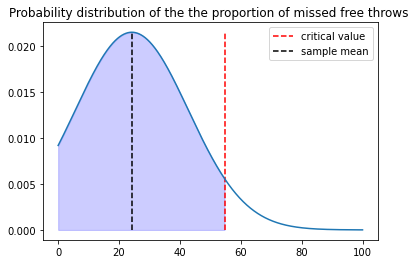

In [50]:
#Critical region == null hyphothesis rejection region

x = np.arange(0,100,0.1)

stdev = np.std(wnba['FT_fail'], ddof = 1)

## based on the Central Limit theorem we should use standard error to define the normar distirbution (of the population) 
dist = stats.norm(m, stdev)

plt.plot(x, dist.pdf(x))

plt.vlines(dist.ppf(0.95), 0, np.max(dist.pdf(x)), linestyles = 'dashed', label ='critical value', color = 'red')

plt.vlines(m, 0, np.max(dist.pdf(x)), linestyles = 'dashed', label ='sample mean')

critical_value  = dist.ppf(0.95)

plt.fill_between(x[x<=critical_value], dist.pdf(x[x<=critical_value]), color = 'blue', alpha = 0.2 )

plt.legend()

plt.title('Probability distribution of the the proportion of missed free throws ')

In [187]:
print('critical value = ', critical_value)
print('sample mean =', m)

critical value =  26.7207030789299
sample mean = 24.171126760563382


In [55]:
stdev0 = np.std(wnba['FT_fail'])
stdev1 = np.std(wnba['FT_fail'], ddof = 1)
stdev1, stdev0

(18.53615053714203, 18.470767086360535)

In [54]:
a,b = stats.norm.fit(wnba['FT_fail'])
a,b

(24.171126760563382, 18.470767086360535)

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [16]:
#your-answer-here

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [15]:
#your code here

In [18]:
#your-answer-here

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [20]:
#your-answer-here

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

In [ ]:
#your code here

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [22]:
#your-answer-here

In [19]:
# your code here

**What are your comments in regards to the results of the test?**

In [24]:
#your-answer-here